In [3]:
%matplotlib nbagg
from openpyxl import load_workbook 
import matplotlib.pyplot as plt
import os

#Lista de los archivos contenidos en la carpeta Vigilancia_Rutinaria
Archivos=sorted(os.listdir('Vigilancia_Rutinaria'))

#Función que permite leer los archivos xlsx contenidos en Vigilancia_Rutinaria
Leer=lambda archivo:load_workbook(filename = 'Vigilancia_Rutinaria/'+archivo,read_only=True)

#Lista con los libros xlsx leidos:
Libros=map(Leer,Archivos)

In [4]:
[i for i in Archivos]

['Vigilancia rutinaria por eventos Departamental 2009.xlsx',
 'Vigilancia rutinaria por eventos Departamental 2010.xlsx',
 'Vigilancia rutinaria por eventos Departamental 2011.xlsx',
 'Vigilancia rutinaria por eventos Departamental 2012.xlsx',
 'Vigilancia rutinaria por eventos Departamental 2013.xlsx',
 'Vigilancia rutinaria por eventos Departamental 2014.xlsx',
 'Vigilancia rutinaria por eventos Departamental 2015.xlsx']

<IPython.core.display.Javascript object>


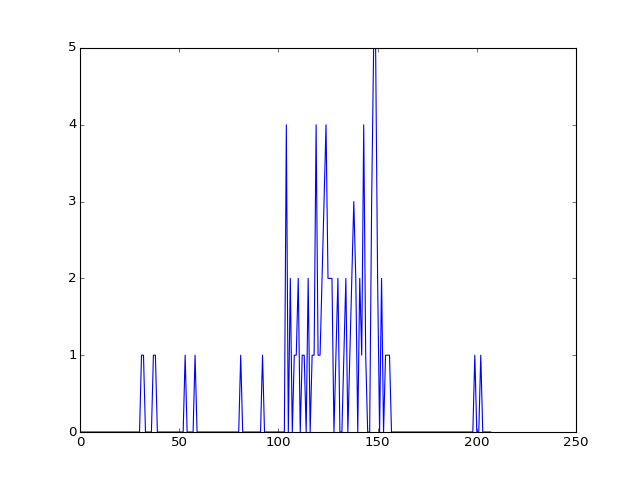

In [5]:
Datos=[]

#Datos de accidente ofidico desde 2009 hasta 2013 para Bogotá
for libro in Libros[:4]:
    for row in libro['Vigilancia envento Dep']['E33:BD33']:
        for cell in row:
            Datos.append(cell.value) 

plt.figure()        
plt.plot(range(len(Datos)),Datos);

In [6]:
%reload_ext version_information
%version_information openpyxl, Os, matplotlib

Software versions
Python 2.7.9 64bit [MSC v.1500 64 bit (AMD64)]
IPython 3.2.0
OS Windows 7 6.1.7601 SP1
openpyxl 2.2.5
Os Os
matplotlib 1.4.3
Thu Jul 16 19:40:55 2015 Hora est. Pacífico, Sudamérica

In [7]:
libro2009= Libros[0]
valores = []

for col in libro2009['Vigilancia envento Dep']['C7:C1331']:
    for cell in col:
        valores.append(cell.value)
        
    
for i in range(0,len(valores)-1):
    if (valores[i] == '11'):
        print (i+7)
        #print (valores[i])

33
126
156
177
205
241
266
297
317
346
381
402
418
446
537
567
598
620
648
761
793
818
835
858
882
921
955
1003
1033
1066
1100
1133
1187
1218
1251
1287
1323


Mirando un poco como es que trabajan los generadores, podemos construir una matriz con el contenido de la hoja xlsx.
No se que tan eficiente sea, pero tal vez nos sea util en algún momento. 
Entonces para crear una matriz[fil,col]:

In [8]:
import numpy as np
Matriz2009=np.array(list(libro2009['Vigilancia envento Dep']['A0:BD1331']))

Facilita moverse a través de la hoja y no tenemos que usar más el objeto libro2009:

In [9]:
#Mostar valor de la fila 33 columna 3 (columna D)
print(Matriz2009[33,3].value)

BOGOTA


In [10]:
#Las filas donde se encuentra Bogotá también se pudieron haber encontrado así:
valor=lambda x:x.value
Col3 =np.array(map(valor,Matriz2009[:,3]))
S=[i for i in range(len(Col3)) if Col3[i]=='BOGOTA']

In [11]:
S

[33,
 126,
 156,
 177,
 205,
 241,
 266,
 297,
 317,
 346,
 381,
 402,
 418,
 446,
 537,
 567,
 598,
 620,
 648,
 761,
 793,
 818,
 835,
 858,
 882,
 921,
 955,
 1003,
 1033,
 1066,
 1100,
 1133,
 1187,
 1218,
 1251,
 1287,
 1323]

In [12]:
#Los códigos de los eventos y los eventos correspondientes:

#Función que retorna los valores de la columna x:
Col=lambda x:np.array(map(valor,Matriz2009[:,x]))

#Lista con los codigos de los eventos y su ubicación en la columna 
ListCodE=[(int(Col(0)[i]),i) for i in range(1331) if Col(0)[i]!=None and Col(0)[i]!='Cod evento' and Col(0)[i]!='Total general']

#Lista con los eventos y su ubicación en la columna
ListEvent=[(Col(1)[i],i) for i in range(1331) if Col(1)[i]!=None and Col(1)[i]!='Total' and Col(1)[i]!='Nombre evento']


In [13]:
ListEvent

[(u'ACCIDENTE OFIDICO', 7),
 (u'DENGUE', 42),
 (u'DENGUE GRAVE', 77),
 (u'EVENTO ADVERSO SEGUIDO A LA VACUNACION.', 110),
 (u'AGRESIONES POR ANIMALES POTENCIALMENTE TRANSMISORES DE RABIA', 130),
 (u'FIEBRE TIFOIDEA Y PARATIFOIDEA', 166),
 (u'HEPATITIS A', 180),
 (u'HEPATITIS B', 215),
 (u'HIPOTIROIDISMO CONGENITO', 250),
 (u'ESI - IRAG (VIGILANCIA CENTINELA)', 271),
 (u'INFECCION RESPIRATORIA AGUDA GRAVE IRAG INUSITADA', 307),
 (u'INTOXICACION POR PLAGUICIDAS', 321),
 (u'INTOXICACION POR FARMACOS', 356),
 (u'INTOXICACION POR METANOL', 391),
 (u'INTOXICACION POR METALES PESADOS', 408),
 (u'INTOXICACION POR SOLVENTES', 423),
 (u'LEISHMANIASIS CUTANEA', 452),
 (u'LEISHMANIASIS MUCOSA', 485),
 (u'LEISHMANIASIS VISCERAL', 507),
 (u'LEPRA', 514),
 (u'LEPTOSPIROSIS', 544),
 (u'LEUCEMIA AGUDA PEDIATRICA LINFOIDE', 574),
 (u'LEUCEMIA AGUDA PEDIATRICA MIELOIDE', 605),
 (u'LESIONES POR POLVORA', 623),
 (u'MALARIA ASOCIADA (FORMAS MIXTAS)', 655),
 (u'MALARIA FALCIPARUM', 685),
 (u'MALARIA MALARIE'

Con las listas ListEvent y ListCodE se pueden hacer diccionarios interesantes, por ejemplo uno donde la clave sea el
código del evento y el valor sea el evento:

In [14]:
DicEvent=dict(zip(np.array(ListCodE)[:,0],np.array(ListEvent)[:,0]))

In [15]:
#Para ver el evento con código 456:
print DicEvent.get(456)

LEUCEMIA AGUDA PEDIATRICA LINFOIDE


In [16]:
#O un diccionario donde la clave sea el nombre del evento y el valor sea su numero de fila:
DicUbicEvent=dict(zip(np.array(ListEvent)[:,0],np.array(ListEvent)[:,1]))

In [17]:
#Para ver en que fila esta la LEUCEMIA AGUDA PEDIATRICA LINFOIDE:

print DicUbicEvent.get('LEUCEMIA AGUDA PEDIATRICA LINFOIDE')

574


En el caso de que en otro xlsx un evento este en una fila distinta se podría usar los dos diccionarios equivalentes para obtener el 
valor de la fila a partir de el código del evento:

In [18]:
#Fila para el evento 330:
print 'Evento: ' +str(DicEvent.get(330))
print 'En la fila: '+str(DicUbicEvent.get(DicEvent.get(330)))

Evento: HEPATITIS A
En la fila: 180


<IPython.core.display.Javascript object>


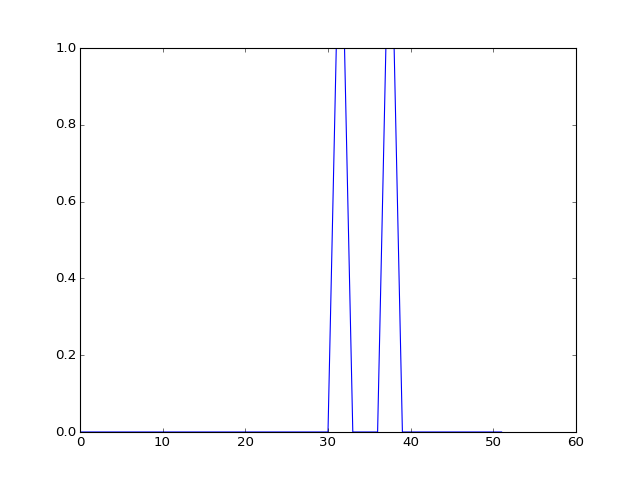

In [19]:
#Con la matriz así sería para graficar(sólo 2009): 

#Función que retorna los valores de la fila x:
Fil=lambda x:np.array(map(valor,Matriz2009[x,:]))

plt.figure()
plt.plot(np.arange(len(Fil(33)[4:])),Fil(33)[4:]);